In [9]:
import pandas as pd 
import numpy as np
from dealib import dea
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('Data.xlsx', sheet_name = 'Fact_Academy')
data = data[data.Year.isin([2016, 2021])].reset_index(drop = True)
data_original = data.copy()
print(data.shape)
data.head(3)

(32, 14)


,Institution_YearCode,Year,Students,StudentsB.S,StudentsPhd,StudentsM.S,First_Year_Students,StudentsB.S.c_Engineering,StudentsM.S.c_Engineering,StudentsP.H.D_Engineering,Number_of_Degree_Recipients,Number_of_Bachelor's_Degree_Recipients,Number_of_Master's_Degree_Recipients,Number_of_Doctorate_Degree_Recipients
0,12021,2021,21817,13212,2329,6119.0,4356,357,0,12,5458,2801,2161,383
1,12016,2016,20171,11573,2224,6209.0,4720,327,3,7,5402,2888,2148,278
2,22021,2021,18428,12580,1668,4089.0,4206,5127,797,429,5194,3103,1744,256


In [42]:
####### Create Data #######

# Institution Type
dim_institute = fact_expenses = pd.read_excel('Data.xlsx', sheet_name = 'Dim_Institutions_YearCode')

# Institution Names 
institute_name = fact_expenses = pd.read_excel('Data.xlsx', sheet_name = 'Dim_Institutions')
institute_name = institute_name.drop(['InstitutionOpenAlex_ID'], axis = 1)

# Expenses
fact_expenses = pd.read_excel('Data.xlsx', sheet_name = 'Expanses_Orederd1')
fact_expenses = fact_expenses[(fact_expenses.Expanse_Code == 1) & (fact_expenses.Year.isin([2016, 2021]))].drop('Expanse_Code', axis = 1)
fact_expenses = fact_expenses.rename(columns = {'Amount': 'Expenses'}).reset_index(drop = True)

# Teaching & Reseach Expenses
fact_expenses_teach = pd.read_excel('Data.xlsx', sheet_name = 'Expanses_Orederd1')
fact_expenses_teach = fact_expenses_teach[(fact_expenses_teach.Expanse_Code == 2) & (fact_expenses_teach.Year.isin([2016, 2021]))].drop('Expanse_Code', axis = 1)
fact_expenses_teach = fact_expenses_teach.rename(columns = {'Amount': ' Teaching&Research_Expenses'}).reset_index(drop = True)

# Marketing Expenses
marketing_expenses = pd.read_excel('Data.xlsx', sheet_name = 'Expanses_Orederd1')
marketing_expenses = marketing_expenses[(marketing_expenses.Expanse_Code == 4) & (marketing_expenses.Year.isin([2016, 2021]))].drop('Expanse_Code', axis = 1)
marketing_expenses = marketing_expenses.rename(columns = {'Amount': ' Marketing_Expenses'}).reset_index(drop = True)

# Salary Expenses
salary_expenses = pd.read_excel('Data.xlsx', sheet_name = 'Expanses_Orederd1')
salary_expenses = salary_expenses[(salary_expenses.Expanse_Code == 3) & (salary_expenses.Year.isin([2016, 2021]))].drop('Expanse_Code', axis = 1)
salary_expenses = salary_expenses.rename(columns = {'Amount': 'Salary_Expenses'}).reset_index(drop = True)

# Incomes
fact_incomes = pd.read_excel('Data.xlsx', sheet_name = 'Expanses_Orederd1')
fact_incomes = fact_incomes[(fact_incomes.Expanse_Code == 5) & (fact_incomes.Year.isin([2016, 2021]))].drop('Expanse_Code', axis = 1)
fact_incomes = fact_incomes.rename(columns = {'Amount': 'Incomes'}).reset_index(drop = True)

# Administratif Staff
admin_staff = pd.read_excel('Data.xlsx', sheet_name = 'Staff_Oredered1')
admin_staff = admin_staff[(admin_staff.Staff_Type == 4) & (admin_staff.Year.isin([2016, 2021]))].drop('Staff_Type', axis = 1)
admin_staff = admin_staff.rename(columns = {'Staff_Amount': 'Administratif_Staff'}).reset_index(drop = True)

# Senior Academic Staff
senior_staff = pd.read_excel('Data.xlsx', sheet_name = 'Staff_Oredered1')
senior_staff = senior_staff[(senior_staff.Staff_Type == 1) & (senior_staff.Year.isin([2016, 2021]))].drop('Staff_Type', axis = 1)
senior_staff = senior_staff.rename(columns = {'Staff_Amount': 'Senior_Staff'}).reset_index(drop = True)

# Publications & Citations
mention = pd.read_excel('Data.xlsx', sheet_name = 'OpenAlex_Data').drop(['InstitutionOpenAlex_ID', 'Site_code'], axis = 1)

## Heatmap Function

In [58]:
from typing import List

def corr_heatmap(dataset, tiles:str, institute_type:List):
    ''' 
    Return Correlation Heatmap.
    args:
        data: Inputs / Outputs dataset
        tiles: 'inputs'/'outputs'
        institute_type:List 1 for University, 2 for Colleges 
    '''

    if tiles not in ['outputs', 'inputs']:
        print("Error: tiles argument must be 'outputs' or 'inputs'")
        return

    data_corr = dataset.copy()
    data_corr = data_corr[data_corr.Institution_TypeID.isin(institute_type)]
    data_corr = data_corr.drop(columns = ['Institution_YearCode', 'Year', 'Institution_Code', 'Institution_Name', 'Institution_TypeID'], axis = 1)
    title = 'Universities' if institute_type == [1] else ('Colleges' if institute_type == [2] else 'Universities & Colleges')
    data_title = 'Outputs' if tiles == 'outputs' else 'Inputs'
    
    plt.figure(figsize = (20, 6))
    sns.heatmap(data_corr.corr(), cbar = False, annot = True)
    plt.title(f'{data_title} Data Correlation - {title}', fontsize = 20, fontweight = 'bold', color = 'black', y = 1.04)
    plt.xticks(rotation = 45)
    plt.show()

## Inputs Correlation

In [47]:
input_data = data.copy()
input_data = input_data[['Institution_YearCode', 'Year', 'Students']]

input_data = pd.merge(input_data, fact_expenses, on = ['Institution_YearCode', 'Year'], how = 'left')
input_data = pd.merge(input_data, fact_expenses_teach, on = ['Institution_YearCode', 'Year'], how = 'left')
input_data = pd.merge(input_data, marketing_expenses, on = ['Institution_YearCode', 'Year'], how = 'left')
input_data = pd.merge(input_data, salary_expenses, on = ['Institution_YearCode', 'Year'], how = 'left')
input_data = pd.merge(input_data, senior_staff, on = ['Institution_YearCode', 'Year'], how = 'left')
input_data = pd.merge(input_data, admin_staff, on = ['Institution_YearCode', 'Year'], how = 'left')

input_data = pd.merge(input_data, dim_institute, on = ['Institution_YearCode'], how = 'left')
input_data = pd.merge(input_data, institute_name, on = ['Institution_Code'], how = 'left')
input_data.head()

,Institution_YearCode,Year,Students,Expenses,Teaching&Research_Expenses,Marketing_Expenses,Salary_Expenses,Senior_Staff,Administratif_Staff,Institution_Code,Institution_Name,Institution_TypeID
0,12021,2021,21817,2283629,1696539,25916,1379798,955.37,1360.97,1,Hebrew University,1
1,12016,2016,20171,2658946,1764329,21997,1206735,854.03,1290.45,1,Hebrew University,1
2,22021,2021,18428,1688517,1129215,8025,1015726,953.91,1372.16,2,Ben-Gurion,1
3,22016,2016,17918,1636162,1091978,7889,935506,877.77,1030.19,2,Ben-Gurion,1
4,32021,2021,19819,1285272,732341,14966,924583,714.93,942.61,3,Bar-Ilan,1


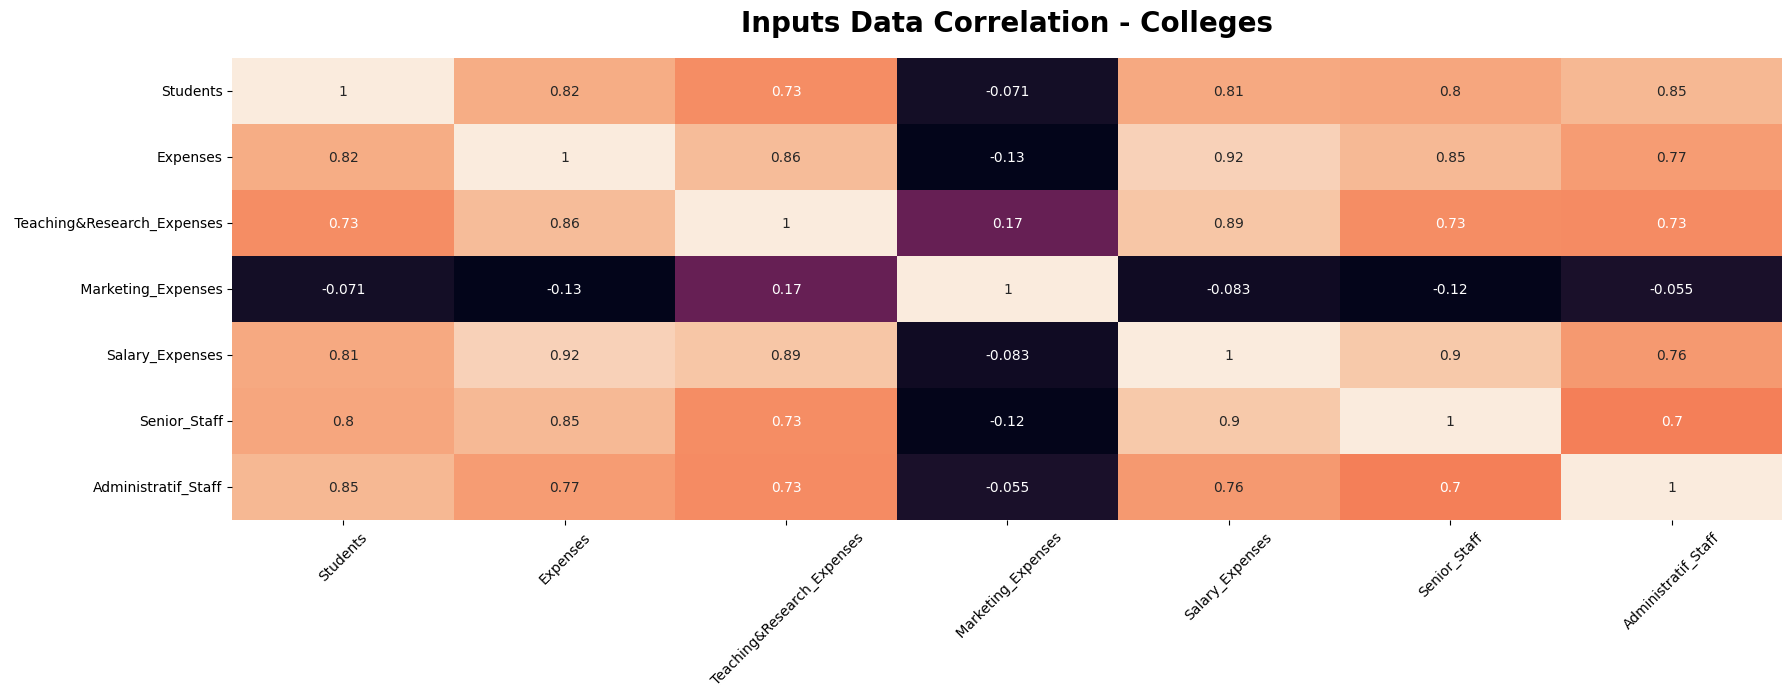

In [61]:
corr_heatmap(dataset = input_data, tiles = 'inputs', institute_type = [2])

## Outputs Correlation

In [17]:
output_data = data.copy()
output_data = output_data[['Institution_YearCode', 'Year', 'Students', 'First_Year_Students', 'Number_of_Degree_Recipients']]

output_data = pd.merge(output_data, fact_incomes, on = ['Institution_YearCode', 'Year'], how = 'left')
output_data = pd.merge(output_data, mention, on = ['Institution_YearCode'], how = 'left')

output_data = pd.merge(output_data, dim_institute, on = ['Institution_YearCode'], how = 'left')
output_data = pd.merge(output_data, institute_name, on = ['Institution_Code'], how = 'left')
output_data.head()

,Institution_YearCode,Year,Students,First_Year_Students,Number_of_Degree_Recipients,Incomes,Publications Count,Citations Count,Institution_Code,Institution_Name,Institution_TypeID
0,12021,2021,21817,4356,5458,2596849,5161,305076,1,Hebrew University,1
1,12016,2016,20171,4720,5402,2967007,3653,200848,1,Hebrew University,1
2,22021,2021,18428,4206,5194,1771120,4333,169241,2,Ben-Gurion,1
3,22016,2016,17918,3831,5626,1636738,3227,93364,2,Ben-Gurion,1
4,32021,2021,19819,4153,5489,1398689,3043,119633,3,Bar-Ilan,1


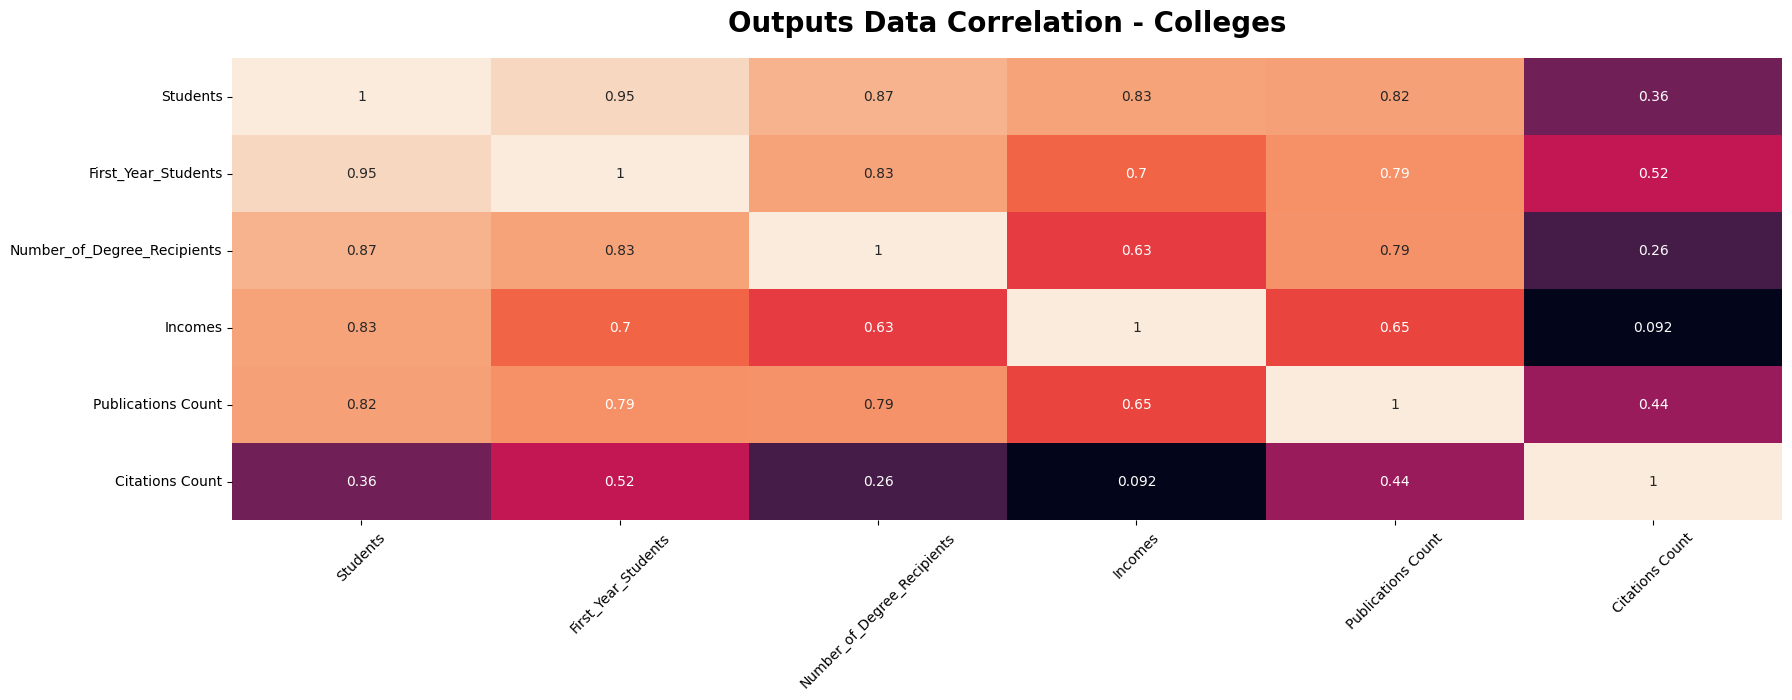

In [62]:
corr_heatmap(dataset = output_data, tiles = 'outputs', institute_type = [2])